In [1]:
# importing basic python libraries
import pandas as pd
import numpy as np

# importing data visualisation libraries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# import scikit-learn split function
from sklearn.model_selection import train_test_split

# import K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# import scikit-learn module to encode classes into one-hot coding matrix
from sklearn.preprocessing import LabelEncoder

# import keras module
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


### load data

In [2]:
# loading data into pandas dataframe
df = pd.read_csv('Iris.csv')

## preprocess data

clean data: find and handle missing data

In [3]:
# to check for null values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## exploratory data analysis

In [4]:
# get dimensions of dataset
print(df.shape)

(150, 6)


In [5]:
# get types of data for all variables
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
# looking at the top few rows data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# get the summary statistics of numeric variables
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# identifying class distributions
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


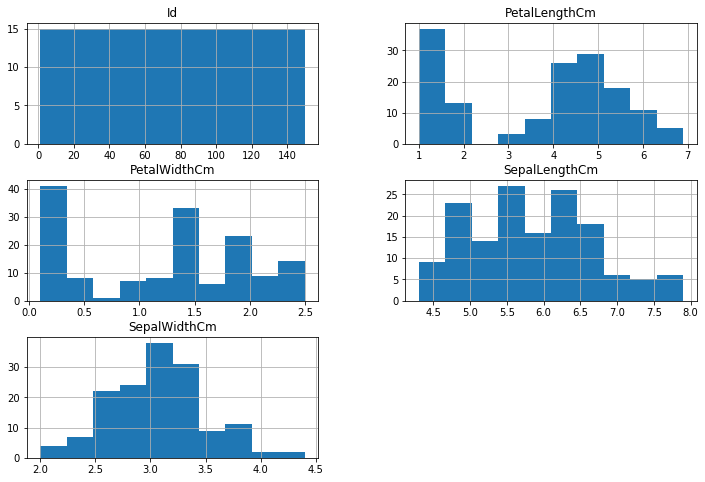

In [9]:
# visualising each numeric variable
df.hist(figsize=(12,8))
pyplot.show()

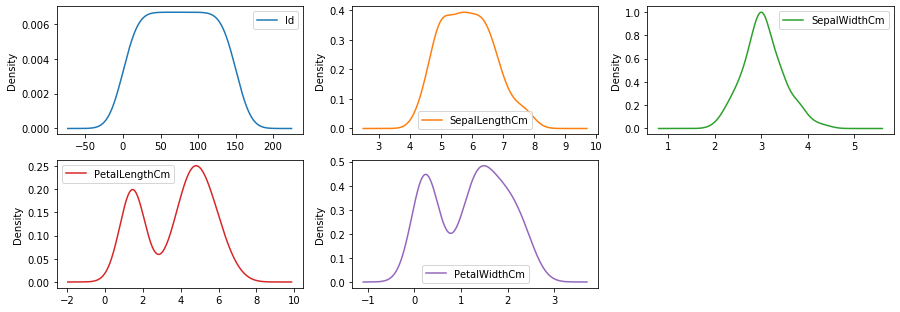

In [10]:
#to get the density plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True,figsize=(15,8))
pyplot.show()

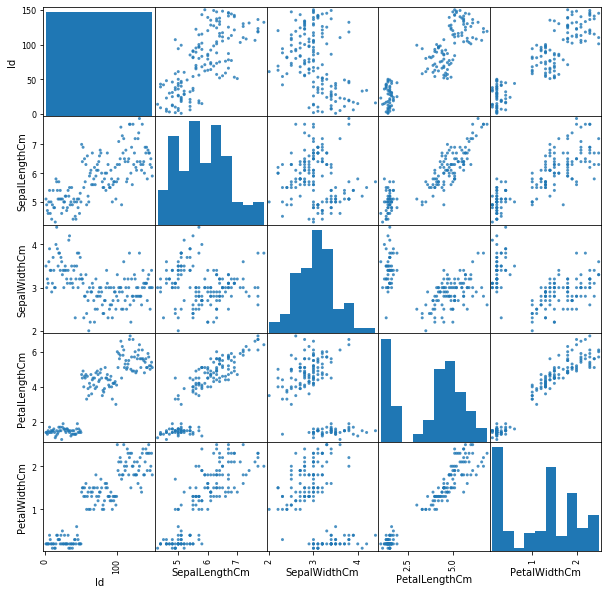

In [11]:
# scatter plot matrix
scatter_matrix(df, alpha=0.8, figsize=(10,10))
pyplot.show()

## seperate dataset into input and output arrays

In [12]:
array = df.values
X = array[:,1:5]
Y = array[:,5]

## split data into train ad test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Encode Class Values - One-Hot Coding

In [14]:
#encode class values as integers
encoder_train = LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train = encoder_train.transform(Y_train)

#convert integers into one-hot coding format
onehot_Y_train = np_utils.to_categorical(encoded_Y_train)

#----------
#encode class values as integers
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)

#convert integers into one-hot coding format
onehot_Y_test = np_utils.to_categorical(encoded_Y_test)

## MLP with keras

In [15]:
# define a function to create a baseline model
# the network: 2-layered MLP = INPUT neurons + 1 hidden layer + OUTPUT layer
# optimization algorith: the adam
# loss function : cross entropy

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
# create the model
model = baseline_model()

## train the model

In [17]:
# train the model
model.fit(X_train, onehot_Y_train, epochs=150, batch_size=10)

Epoch 1/150
100/100 [==============================] - 0s 1ms/step - loss: 2.2210 - accuracy: 0.3000
Epoch 2/150
100/100 [==============================] - 0s 189us/step - loss: 2.0117 - accuracy: 0.3000
Epoch 3/150
100/100 [==============================] - 0s 190us/step - loss: 1.8143 - accuracy: 0.2800
Epoch 4/150
100/100 [==============================] - 0s 209us/step - loss: 1.6373 - accuracy: 0.2800
Epoch 5/150
100/100 [==============================] - 0s 229us/step - loss: 1.4787 - accuracy: 0.2800
Epoch 6/150
100/100 [==============================] - 0s 219us/step - loss: 1.3510 - accuracy: 0.2900
Epoch 7/150
100/100 [==============================] - 0s 160us/step - loss: 1.2563 - accuracy: 0.3100
Epoch 8/150
100/100 [==============================] - 0s 180us/step - loss: 1.1748 - accuracy: 0.5000
Epoch 9/150
100/100 [==============================] - 0s 209us/step - loss: 1.1147 - accuracy: 0.6300
Epoch 10/150
100/100 [==============================] - 0s 185us/step - los

100/100 [==============================] - 0s 180us/step - loss: 0.5327 - accuracy: 0.6400
Epoch 80/150
100/100 [==============================] - 0s 179us/step - loss: 0.5309 - accuracy: 0.6400
Epoch 81/150
100/100 [==============================] - 0s 209us/step - loss: 0.5295 - accuracy: 0.6400
Epoch 82/150
100/100 [==============================] - 0s 189us/step - loss: 0.5280 - accuracy: 0.6400
Epoch 83/150
100/100 [==============================] - 0s 189us/step - loss: 0.5265 - accuracy: 0.6400
Epoch 84/150
100/100 [==============================] - 0s 170us/step - loss: 0.5250 - accuracy: 0.6500
Epoch 85/150
100/100 [==============================] - 0s 160us/step - loss: 0.5237 - accuracy: 0.6500
Epoch 86/150
100/100 [==============================] - 0s 189us/step - loss: 0.5226 - accuracy: 0.6500
Epoch 87/150
100/100 [==============================] - 0s 160us/step - loss: 0.5214 - accuracy: 0.6500
Epoch 88/150
100/100 [==============================] - 0s 170us/step - loss:

## Evaluate model with K-Fold cross validation

In [18]:
# create kerasClassifier to evaluate the model
evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

In [19]:
# evaluate the model
kfold = KFold(n_splits=10, shuffle = True, random_state=42)

In [20]:
# using k-fold cross validation to evaluate the model
results = cross_val_score(evaluator, X_test, onehot_Y_test, cv=kfold)

print("baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
45/45 [==============================] - 0s 2ms/step - loss: 1.1206 - accuracy: 0.3556
Epoch 2/200
45/45 [==============================] - 0s 310us/step - loss: 1.0930 - accuracy: 0.3556
Epoch 3/200
45/45 [==============================] - 0s 310us/step - loss: 1.0768 - accuracy: 0.3556
Epoch 4/200
45/45 [==============================] - 0s 310us/step - loss: 1.0617 - accuracy: 0.3556
Epoch 5/200
45/45 [==============================] - 0s 288us/step - loss: 1.0465 - accuracy: 0.3333
Epoch 6/200
45/45 [==============================] - 0s 310us/step - loss: 1.0321 - accuracy: 0.3333
Epoch 7/200
45/45 [==============================] - 0s 310us/step - loss: 1.0178 - accuracy: 0.3778
Epoch 8/200
45/45 [==============================] - 0s 288us/step - loss: 1.0038 - accuracy: 0.4667
Epoch 9/200
45/45 [==============================] - 0s 288us/step - loss: 0.9908 - accuracy: 0.6000
Epoch 10/200
45/45 [==============================] - 0s 310us/step - loss: 0.9790 - accuracy

45/45 [==============================] - 0s 310us/step - loss: 0.6245 - accuracy: 0.7111
Epoch 82/200
45/45 [==============================] - 0s 288us/step - loss: 0.6200 - accuracy: 0.7111
Epoch 83/200
45/45 [==============================] - 0s 266us/step - loss: 0.6168 - accuracy: 0.7111
Epoch 84/200
45/45 [==============================] - 0s 288us/step - loss: 0.6135 - accuracy: 0.7111
Epoch 85/200
45/45 [==============================] - 0s 266us/step - loss: 0.6107 - accuracy: 0.7111
Epoch 86/200
45/45 [==============================] - 0s 266us/step - loss: 0.6075 - accuracy: 0.7111
Epoch 87/200
45/45 [==============================] - 0s 288us/step - loss: 0.6037 - accuracy: 0.7111
Epoch 88/200
45/45 [==============================] - 0s 288us/step - loss: 0.6012 - accuracy: 0.7111
Epoch 89/200
45/45 [==============================] - 0s 310us/step - loss: 0.5989 - accuracy: 0.7111
Epoch 90/200
45/45 [==============================] - 0s 288us/step - loss: 0.5942 - accuracy: 

45/45 [==============================] - 0s 288us/step - loss: 0.3660 - accuracy: 0.9333
Epoch 161/200
45/45 [==============================] - 0s 266us/step - loss: 0.3640 - accuracy: 0.9333
Epoch 162/200
45/45 [==============================] - 0s 288us/step - loss: 0.3627 - accuracy: 0.9333
Epoch 163/200
45/45 [==============================] - 0s 266us/step - loss: 0.3569 - accuracy: 0.9556
Epoch 164/200
45/45 [==============================] - 0s 266us/step - loss: 0.3553 - accuracy: 0.9333
Epoch 165/200
45/45 [==============================] - 0s 288us/step - loss: 0.3535 - accuracy: 0.9556
Epoch 166/200
45/45 [==============================] - 0s 288us/step - loss: 0.3489 - accuracy: 0.9333
Epoch 167/200
45/45 [==============================] - 0s 288us/step - loss: 0.3458 - accuracy: 0.9556
Epoch 168/200
45/45 [==============================] - 0s 332us/step - loss: 0.3441 - accuracy: 0.9556
Epoch 169/200
45/45 [==============================] - 0s 377us/step - loss: 0.3410 - a

45/45 [==============================] - 0s 377us/step - loss: 0.7599 - accuracy: 0.7111
Epoch 40/200
45/45 [==============================] - 0s 382us/step - loss: 0.7562 - accuracy: 0.7111
Epoch 41/200
45/45 [==============================] - 0s 399us/step - loss: 0.7527 - accuracy: 0.7111
Epoch 42/200
45/45 [==============================] - 0s 443us/step - loss: 0.7490 - accuracy: 0.7111
Epoch 43/200
45/45 [==============================] - 0s 332us/step - loss: 0.7457 - accuracy: 0.7111
Epoch 44/200
45/45 [==============================] - 0s 339us/step - loss: 0.7423 - accuracy: 0.7111
Epoch 45/200
45/45 [==============================] - 0s 399us/step - loss: 0.7385 - accuracy: 0.7111
Epoch 46/200
45/45 [==============================] - 0s 421us/step - loss: 0.7352 - accuracy: 0.7111
Epoch 47/200
45/45 [==============================] - 0s 488us/step - loss: 0.7319 - accuracy: 0.7111
Epoch 48/200
45/45 [==============================] - 0s 421us/step - loss: 0.7291 - accuracy: 

45/45 [==============================] - 0s 288us/step - loss: 0.5665 - accuracy: 0.7111
Epoch 120/200
45/45 [==============================] - 0s 288us/step - loss: 0.5647 - accuracy: 0.7111
Epoch 121/200
45/45 [==============================] - 0s 288us/step - loss: 0.5630 - accuracy: 0.7111
Epoch 122/200
45/45 [==============================] - 0s 288us/step - loss: 0.5616 - accuracy: 0.7111
Epoch 123/200
45/45 [==============================] - 0s 288us/step - loss: 0.5597 - accuracy: 0.7111
Epoch 124/200
45/45 [==============================] - 0s 266us/step - loss: 0.5585 - accuracy: 0.7111
Epoch 125/200
45/45 [==============================] - 0s 288us/step - loss: 0.5568 - accuracy: 0.7111
Epoch 126/200
45/45 [==============================] - 0s 266us/step - loss: 0.5548 - accuracy: 0.7111
Epoch 127/200
45/45 [==============================] - 0s 266us/step - loss: 0.5531 - accuracy: 0.7111
Epoch 128/200
45/45 [==============================] - 0s 266us/step - loss: 0.5516 - a

45/45 [==============================] - 0s 288us/step - loss: 0.4551 - accuracy: 0.7556
Epoch 199/200
45/45 [==============================] - 0s 288us/step - loss: 0.4539 - accuracy: 0.7556
Epoch 200/200
5/5 [==============================] - 0s 3ms/step
Epoch 1/200
45/45 [==============================] - 0s 2ms/step - loss: 1.2967 - accuracy: 0.3556
Epoch 2/200
45/45 [==============================] - 0s 288us/step - loss: 1.2750 - accuracy: 0.3556
Epoch 3/200
45/45 [==============================] - 0s 310us/step - loss: 1.2456 - accuracy: 0.3556
Epoch 4/200
45/45 [==============================] - 0s 266us/step - loss: 1.2177 - accuracy: 0.3556
Epoch 5/200
45/45 [==============================] - 0s 310us/step - loss: 1.1911 - accuracy: 0.3556
Epoch 6/200
45/45 [==============================] - 0s 288us/step - loss: 1.1601 - accuracy: 0.3556
Epoch 7/200
45/45 [==============================] - 0s 310us/step - loss: 1.1337 - accuracy: 0.3556
Epoch 8/200
45/45 [===================

45/45 [==============================] - 0s 310us/step - loss: 0.3616 - accuracy: 0.8667
Epoch 78/200
45/45 [==============================] - 0s 288us/step - loss: 0.3591 - accuracy: 0.8667
Epoch 79/200
45/45 [==============================] - 0s 310us/step - loss: 0.3531 - accuracy: 0.8667
Epoch 80/200
45/45 [==============================] - 0s 310us/step - loss: 0.3483 - accuracy: 0.8667
Epoch 81/200
45/45 [==============================] - 0s 288us/step - loss: 0.3441 - accuracy: 0.8667
Epoch 82/200
45/45 [==============================] - 0s 288us/step - loss: 0.3400 - accuracy: 0.8667
Epoch 83/200
45/45 [==============================] - 0s 310us/step - loss: 0.3365 - accuracy: 0.9111
Epoch 84/200
45/45 [==============================] - 0s 288us/step - loss: 0.3325 - accuracy: 0.9111
Epoch 85/200
45/45 [==============================] - 0s 288us/step - loss: 0.3280 - accuracy: 0.8889
Epoch 86/200
45/45 [==============================] - 0s 288us/step - loss: 0.3238 - accuracy: 

45/45 [==============================] - 0s 332us/step - loss: 0.1426 - accuracy: 1.0000
Epoch 157/200
45/45 [==============================] - 0s 310us/step - loss: 0.1409 - accuracy: 1.0000
Epoch 158/200
45/45 [==============================] - 0s 310us/step - loss: 0.1385 - accuracy: 1.0000
Epoch 159/200
45/45 [==============================] - 0s 288us/step - loss: 0.1373 - accuracy: 1.0000
Epoch 160/200
45/45 [==============================] - 0s 310us/step - loss: 0.1360 - accuracy: 1.0000
Epoch 161/200
45/45 [==============================] - 0s 288us/step - loss: 0.1349 - accuracy: 1.0000
Epoch 162/200
45/45 [==============================] - 0s 288us/step - loss: 0.1326 - accuracy: 1.0000
Epoch 163/200
45/45 [==============================] - 0s 310us/step - loss: 0.1325 - accuracy: 1.0000
Epoch 164/200
45/45 [==============================] - 0s 332us/step - loss: 0.1327 - accuracy: 1.0000
Epoch 165/200
45/45 [==============================] - 0s 310us/step - loss: 0.1307 - a

45/45 [==============================] - 0s 288us/step - loss: 0.6912 - accuracy: 0.7333
Epoch 36/200
45/45 [==============================] - 0s 310us/step - loss: 0.6770 - accuracy: 0.7333
Epoch 37/200
45/45 [==============================] - 0s 288us/step - loss: 0.6647 - accuracy: 0.7333
Epoch 38/200
45/45 [==============================] - 0s 288us/step - loss: 0.6517 - accuracy: 0.7333
Epoch 39/200
45/45 [==============================] - 0s 355us/step - loss: 0.6405 - accuracy: 0.7333
Epoch 40/200
45/45 [==============================] - 0s 332us/step - loss: 0.6284 - accuracy: 0.7333
Epoch 41/200
45/45 [==============================] - 0s 332us/step - loss: 0.6178 - accuracy: 0.7333
Epoch 42/200
45/45 [==============================] - 0s 288us/step - loss: 0.6067 - accuracy: 0.7333
Epoch 43/200
45/45 [==============================] - 0s 288us/step - loss: 0.5984 - accuracy: 0.7333
Epoch 44/200
45/45 [==============================] - 0s 288us/step - loss: 0.5841 - accuracy: 

45/45 [==============================] - 0s 288us/step - loss: 0.2776 - accuracy: 0.9556
Epoch 116/200
45/45 [==============================] - 0s 266us/step - loss: 0.2813 - accuracy: 0.9778
Epoch 117/200
45/45 [==============================] - 0s 288us/step - loss: 0.2747 - accuracy: 0.9778
Epoch 118/200
45/45 [==============================] - 0s 288us/step - loss: 0.2720 - accuracy: 0.9556
Epoch 119/200
45/45 [==============================] - 0s 266us/step - loss: 0.2703 - accuracy: 0.9556
Epoch 120/200
45/45 [==============================] - 0s 288us/step - loss: 0.2687 - accuracy: 0.9556
Epoch 121/200
45/45 [==============================] - 0s 266us/step - loss: 0.2666 - accuracy: 0.9778
Epoch 122/200
45/45 [==============================] - 0s 288us/step - loss: 0.2673 - accuracy: 0.9778
Epoch 123/200
45/45 [==============================] - 0s 288us/step - loss: 0.2630 - accuracy: 0.9778
Epoch 124/200
45/45 [==============================] - 0s 310us/step - loss: 0.2612 - a

45/45 [==============================] - 0s 332us/step - loss: 0.1702 - accuracy: 0.9778
Epoch 194/200
45/45 [==============================] - 0s 355us/step - loss: 0.1701 - accuracy: 0.9778
Epoch 195/200
45/45 [==============================] - 0s 310us/step - loss: 0.1703 - accuracy: 0.9778
Epoch 196/200
45/45 [==============================] - 0s 332us/step - loss: 0.1697 - accuracy: 0.9778
Epoch 197/200
45/45 [==============================] - 0s 310us/step - loss: 0.1684 - accuracy: 0.9778
Epoch 198/200
45/45 [==============================] - 0s 310us/step - loss: 0.1659 - accuracy: 0.9778
Epoch 199/200
45/45 [==============================] - 0s 332us/step - loss: 0.1650 - accuracy: 0.9778
Epoch 200/200
5/5 [==============================] - 0s 4ms/step
Epoch 1/200
45/45 [==============================] - 0s 2ms/step - loss: 1.2734 - accuracy: 0.6889
Epoch 2/200
45/45 [==============================] - 0s 355us/step - loss: 1.2370 - accuracy: 0.6889
Epoch 3/200
45/45 [=========

45/45 [==============================] - 0s 288us/step - loss: 0.5335 - accuracy: 0.6889
Epoch 73/200
45/45 [==============================] - 0s 399us/step - loss: 0.5288 - accuracy: 0.6889
Epoch 74/200
45/45 [==============================] - 0s 355us/step - loss: 0.5254 - accuracy: 0.6889
Epoch 75/200
45/45 [==============================] - 0s 377us/step - loss: 0.5200 - accuracy: 0.6889
Epoch 76/200
45/45 [==============================] - 0s 355us/step - loss: 0.5160 - accuracy: 0.6889
Epoch 77/200
45/45 [==============================] - 0s 399us/step - loss: 0.5114 - accuracy: 0.6889
Epoch 78/200
45/45 [==============================] - 0s 355us/step - loss: 0.5077 - accuracy: 0.6889
Epoch 79/200
45/45 [==============================] - 0s 465us/step - loss: 0.5032 - accuracy: 0.6889
Epoch 80/200
45/45 [==============================] - 0s 377us/step - loss: 0.4994 - accuracy: 0.6889
Epoch 81/200
45/45 [==============================] - 0s 399us/step - loss: 0.4956 - accuracy: 

Epoch 152/200
45/45 [==============================] - 0s 310us/step - loss: 0.3495 - accuracy: 0.9333
Epoch 153/200
45/45 [==============================] - 0s 332us/step - loss: 0.3487 - accuracy: 0.9333
Epoch 154/200
45/45 [==============================] - 0s 310us/step - loss: 0.3471 - accuracy: 0.9333
Epoch 155/200
45/45 [==============================] - 0s 310us/step - loss: 0.3452 - accuracy: 0.9333
Epoch 156/200
45/45 [==============================] - 0s 310us/step - loss: 0.3441 - accuracy: 0.9333
Epoch 157/200
45/45 [==============================] - 0s 310us/step - loss: 0.3433 - accuracy: 0.9333
Epoch 158/200
45/45 [==============================] - 0s 288us/step - loss: 0.3414 - accuracy: 0.9333
Epoch 159/200
45/45 [==============================] - 0s 399us/step - loss: 0.3400 - accuracy: 0.9333
Epoch 160/200
45/45 [==============================] - 0s 266us/step - loss: 0.3388 - accuracy: 0.9556
Epoch 161/200
45/45 [==============================] - 0s 288us/step - lo

45/45 [==============================] - 0s 377us/step - loss: 0.7335 - accuracy: 0.7111
Epoch 32/200
45/45 [==============================] - 0s 310us/step - loss: 0.7284 - accuracy: 0.7111
Epoch 33/200
45/45 [==============================] - 0s 288us/step - loss: 0.7235 - accuracy: 0.7111
Epoch 34/200
45/45 [==============================] - 0s 288us/step - loss: 0.7184 - accuracy: 0.7778
Epoch 35/200
45/45 [==============================] - 0s 288us/step - loss: 0.7134 - accuracy: 0.8000
Epoch 36/200
45/45 [==============================] - 0s 332us/step - loss: 0.7088 - accuracy: 0.7778
Epoch 37/200
45/45 [==============================] - 0s 310us/step - loss: 0.7042 - accuracy: 0.7556
Epoch 38/200
45/45 [==============================] - ETA: 0s - loss: 1.0244 - accuracy: 0.40 - 0s 355us/step - loss: 0.6998 - accuracy: 0.7333
Epoch 39/200
45/45 [==============================] - 0s 310us/step - loss: 0.6952 - accuracy: 0.7333
Epoch 40/200
45/45 [==============================] -

45/45 [==============================] - 0s 421us/step - loss: 0.5610 - accuracy: 0.7111
Epoch 111/200
45/45 [==============================] - 0s 399us/step - loss: 0.5600 - accuracy: 0.7111
Epoch 112/200
45/45 [==============================] - 0s 421us/step - loss: 0.5591 - accuracy: 0.7111
Epoch 113/200
45/45 [==============================] - 0s 421us/step - loss: 0.5581 - accuracy: 0.7111
Epoch 114/200
45/45 [==============================] - 0s 377us/step - loss: 0.5573 - accuracy: 0.7111
Epoch 115/200
45/45 [==============================] - 0s 310us/step - loss: 0.5563 - accuracy: 0.7111
Epoch 116/200
45/45 [==============================] - 0s 288us/step - loss: 0.5554 - accuracy: 0.7111
Epoch 117/200
45/45 [==============================] - 0s 288us/step - loss: 0.5546 - accuracy: 0.7111
Epoch 118/200
45/45 [==============================] - 0s 288us/step - loss: 0.5538 - accuracy: 0.7111
Epoch 119/200
45/45 [==============================] - 0s 288us/step - loss: 0.5529 - a

45/45 [==============================] - 0s 266us/step - loss: 0.5110 - accuracy: 0.7111
Epoch 190/200
45/45 [==============================] - 0s 288us/step - loss: 0.5106 - accuracy: 0.7111
Epoch 191/200
45/45 [==============================] - 0s 388us/step - loss: 0.5102 - accuracy: 0.7111
Epoch 192/200
45/45 [==============================] - 0s 310us/step - loss: 0.5099 - accuracy: 0.7111
Epoch 193/200
45/45 [==============================] - 0s 288us/step - loss: 0.5093 - accuracy: 0.7111
Epoch 194/200
45/45 [==============================] - 0s 310us/step - loss: 0.5090 - accuracy: 0.7111
Epoch 195/200
45/45 [==============================] - 0s 288us/step - loss: 0.5086 - accuracy: 0.7111
Epoch 196/200
45/45 [==============================] - 0s 310us/step - loss: 0.5082 - accuracy: 0.7111
Epoch 197/200
45/45 [==============================] - 0s 288us/step - loss: 0.5078 - accuracy: 0.7111
Epoch 198/200
45/45 [==============================] - 0s 288us/step - loss: 0.5074 - a

45/45 [==============================] - 0s 310us/step - loss: 0.4896 - accuracy: 0.8444
Epoch 68/200
45/45 [==============================] - 0s 310us/step - loss: 0.4811 - accuracy: 0.8667
Epoch 69/200
45/45 [==============================] - 0s 310us/step - loss: 0.4749 - accuracy: 0.8667
Epoch 70/200
45/45 [==============================] - 0s 332us/step - loss: 0.4699 - accuracy: 0.8667
Epoch 71/200
45/45 [==============================] - 0s 310us/step - loss: 0.4632 - accuracy: 0.8667
Epoch 72/200
45/45 [==============================] - 0s 310us/step - loss: 0.4586 - accuracy: 0.8667
Epoch 73/200
45/45 [==============================] - 0s 333us/step - loss: 0.4523 - accuracy: 0.8667
Epoch 74/200
45/45 [==============================] - 0s 310us/step - loss: 0.4471 - accuracy: 0.8667
Epoch 75/200
45/45 [==============================] - 0s 310us/step - loss: 0.4423 - accuracy: 0.8667
Epoch 76/200
45/45 [==============================] - 0s 399us/step - loss: 0.4392 - accuracy: 

45/45 [==============================] - 0s 310us/step - loss: 0.2428 - accuracy: 0.9556
Epoch 147/200
45/45 [==============================] - 0s 488us/step - loss: 0.2475 - accuracy: 0.9778
Epoch 148/200
45/45 [==============================] - 0s 443us/step - loss: 0.2380 - accuracy: 0.9556
Epoch 149/200
45/45 [==============================] - 0s 421us/step - loss: 0.2400 - accuracy: 0.9778
Epoch 150/200
45/45 [==============================] - 0s 443us/step - loss: 0.2383 - accuracy: 0.9778
Epoch 151/200
45/45 [==============================] - 0s 443us/step - loss: 0.2328 - accuracy: 0.9556
Epoch 152/200
45/45 [==============================] - 0s 488us/step - loss: 0.2308 - accuracy: 0.9778
Epoch 153/200
45/45 [==============================] - 0s 465us/step - loss: 0.2288 - accuracy: 0.9778
Epoch 154/200
45/45 [==============================] - 0s 510us/step - loss: 0.2277 - accuracy: 0.9778
Epoch 155/200
45/45 [==============================] - 0s 443us/step - loss: 0.2258 - a

Epoch 25/200
45/45 [==============================] - 0s 310us/step - loss: 1.0851 - accuracy: 0.3333
Epoch 26/200
45/45 [==============================] - 0s 310us/step - loss: 1.0739 - accuracy: 0.3333
Epoch 27/200
45/45 [==============================] - 0s 310us/step - loss: 1.0675 - accuracy: 0.3111
Epoch 28/200
45/45 [==============================] - 0s 310us/step - loss: 1.0580 - accuracy: 0.3111
Epoch 29/200
45/45 [==============================] - 0s 333us/step - loss: 1.0547 - accuracy: 0.2444
Epoch 30/200
45/45 [==============================] - 0s 355us/step - loss: 1.0486 - accuracy: 0.2222
Epoch 31/200
45/45 [==============================] - 0s 377us/step - loss: 1.0448 - accuracy: 0.2000
Epoch 32/200
45/45 [==============================] - 0s 310us/step - loss: 1.0429 - accuracy: 0.1778
Epoch 33/200
45/45 [==============================] - 0s 310us/step - loss: 1.0389 - accuracy: 0.2000
Epoch 34/200
45/45 [==============================] - 0s 332us/step - loss: 1.0370

45/45 [==============================] - 0s 310us/step - loss: 0.9569 - accuracy: 0.5333
Epoch 106/200
45/45 [==============================] - 0s 310us/step - loss: 0.9544 - accuracy: 0.5333
Epoch 107/200
45/45 [==============================] - 0s 310us/step - loss: 0.9531 - accuracy: 0.5333
Epoch 108/200
45/45 [==============================] - 0s 310us/step - loss: 0.9504 - accuracy: 0.5333
Epoch 109/200
45/45 [==============================] - 0s 288us/step - loss: 0.9483 - accuracy: 0.5333
Epoch 110/200
45/45 [==============================] - 0s 310us/step - loss: 0.9470 - accuracy: 0.5333
Epoch 111/200
45/45 [==============================] - 0s 288us/step - loss: 0.9442 - accuracy: 0.5333
Epoch 112/200
45/45 [==============================] - 0s 332us/step - loss: 0.9419 - accuracy: 0.5556
Epoch 113/200
45/45 [==============================] - 0s 332us/step - loss: 0.9391 - accuracy: 0.5556
Epoch 114/200
45/45 [==============================] - 0s 310us/step - loss: 0.9400 - a

45/45 [==============================] - 0s 288us/step - loss: 0.7013 - accuracy: 0.6222
Epoch 184/200
45/45 [==============================] - 0s 288us/step - loss: 0.6986 - accuracy: 0.6222
Epoch 185/200
45/45 [==============================] - 0s 310us/step - loss: 0.6955 - accuracy: 0.6444
Epoch 186/200
45/45 [==============================] - 0s 288us/step - loss: 0.6925 - accuracy: 0.6667
Epoch 187/200
45/45 [==============================] - 0s 288us/step - loss: 0.6896 - accuracy: 0.6444
Epoch 188/200
45/45 [==============================] - 0s 310us/step - loss: 0.6863 - accuracy: 0.6444
Epoch 189/200
45/45 [==============================] - 0s 332us/step - loss: 0.6830 - accuracy: 0.6444
Epoch 190/200
45/45 [==============================] - 0s 310us/step - loss: 0.6802 - accuracy: 0.6444
Epoch 191/200
45/45 [==============================] - 0s 288us/step - loss: 0.6772 - accuracy: 0.6667
Epoch 192/200
45/45 [==============================] - 0s 310us/step - loss: 0.6745 - a

45/45 [==============================] - 0s 288us/step - loss: 0.5649 - accuracy: 0.9111
Epoch 63/200
45/45 [==============================] - 0s 332us/step - loss: 0.5556 - accuracy: 0.9111
Epoch 64/200
45/45 [==============================] - 0s 332us/step - loss: 0.5460 - accuracy: 0.9333
Epoch 65/200
45/45 [==============================] - 0s 310us/step - loss: 0.5382 - accuracy: 0.9778
Epoch 66/200
45/45 [==============================] - 0s 310us/step - loss: 0.5272 - accuracy: 0.9778
Epoch 67/200
45/45 [==============================] - 0s 310us/step - loss: 0.5178 - accuracy: 0.9333
Epoch 68/200
45/45 [==============================] - 0s 288us/step - loss: 0.5103 - accuracy: 0.9111
Epoch 69/200
45/45 [==============================] - 0s 288us/step - loss: 0.4996 - accuracy: 0.9111
Epoch 70/200
45/45 [==============================] - 0s 310us/step - loss: 0.4944 - accuracy: 0.9556
Epoch 71/200
45/45 [==============================] - 0s 310us/step - loss: 0.4866 - accuracy: 

45/45 [==============================] - 0s 296us/step - loss: 0.1443 - accuracy: 1.0000
Epoch 142/200
45/45 [==============================] - 0s 266us/step - loss: 0.1436 - accuracy: 1.0000
Epoch 143/200
45/45 [==============================] - 0s 291us/step - loss: 0.1407 - accuracy: 1.0000
Epoch 144/200
45/45 [==============================] - 0s 336us/step - loss: 0.1401 - accuracy: 1.0000
Epoch 145/200
45/45 [==============================] - 0s 332us/step - loss: 0.1384 - accuracy: 1.0000
Epoch 146/200
45/45 [==============================] - 0s 399us/step - loss: 0.1356 - accuracy: 1.0000
Epoch 147/200
45/45 [==============================] - 0s 288us/step - loss: 0.1341 - accuracy: 1.0000
Epoch 148/200
45/45 [==============================] - 0s 288us/step - loss: 0.1327 - accuracy: 1.0000
Epoch 149/200
45/45 [==============================] - 0s 332us/step - loss: 0.1308 - accuracy: 1.0000
Epoch 150/200
45/45 [==============================] - 0s 443us/step - loss: 0.1288 - a

45/45 [==============================] - 0s 417us/step - loss: 1.0978 - accuracy: 0.3556
Epoch 21/200
45/45 [==============================] - 0s 554us/step - loss: 1.0978 - accuracy: 0.3556
Epoch 22/200
45/45 [==============================] - 0s 465us/step - loss: 1.0978 - accuracy: 0.3556
Epoch 23/200
45/45 [==============================] - 0s 488us/step - loss: 1.0978 - accuracy: 0.3556
Epoch 24/200
45/45 [==============================] - 0s 465us/step - loss: 1.0978 - accuracy: 0.3556
Epoch 25/200
45/45 [==============================] - 0s 465us/step - loss: 1.0978 - accuracy: 0.3556
Epoch 26/200
45/45 [==============================] - 0s 421us/step - loss: 1.0977 - accuracy: 0.3556
Epoch 27/200
45/45 [==============================] - 0s 399us/step - loss: 1.0978 - accuracy: 0.3556
Epoch 28/200
45/45 [==============================] - 0s 421us/step - loss: 1.0977 - accuracy: 0.3556
Epoch 29/200
45/45 [==============================] - 0s 421us/step - loss: 1.0978 - accuracy: 

45/45 [==============================] - 0s 288us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 101/200
45/45 [==============================] - 0s 288us/step - loss: 1.0973 - accuracy: 0.3556
Epoch 102/200
45/45 [==============================] - 0s 310us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 103/200
45/45 [==============================] - 0s 288us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 104/200
45/45 [==============================] - 0s 288us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 105/200
45/45 [==============================] - 0s 266us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 106/200
45/45 [==============================] - 0s 310us/step - loss: 1.0973 - accuracy: 0.3556
Epoch 107/200
45/45 [==============================] - 0s 288us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 108/200
45/45 [==============================] - 0s 266us/step - loss: 1.0973 - accuracy: 0.3556
Epoch 109/200
45/45 [==============================] - 0s 266us/step - loss: 1.0972 - a

45/45 [==============================] - 0s 294us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 179/200
45/45 [==============================] - 0s 288us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 180/200
45/45 [==============================] - 0s 292us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 181/200
45/45 [==============================] - 0s 277us/step - loss: 1.0973 - accuracy: 0.3556
Epoch 182/200
45/45 [==============================] - ETA: 0s - loss: 1.0879 - accuracy: 0.60 - 0s 266us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 183/200
45/45 [==============================] - 0s 269us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 184/200
45/45 [==============================] - 0s 291us/step - loss: 1.0973 - accuracy: 0.3556
Epoch 185/200
45/45 [==============================] - 0s 266us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 186/200
45/45 [==============================] - 0s 266us/step - loss: 1.0972 - accuracy: 0.3556
Epoch 187/200
45/45 [========================

## evaluate the model

In [21]:
scores = model.evaluate(X_test, onehot_Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 558us/step

accuracy: 64.00%


In [22]:
scores = model.evaluate(X_train, onehot_Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

100/100 [==============================] - 0s 100us/step

accuracy: 63.00%
